## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93323 | train_mse: 0.56632 | train_mae: 0.60034 |  0:00:00s


epoch 1  | loss: 0.33087 | train_mse: 0.38164 | train_mae: 0.4601  |  0:00:01s


epoch 2  | loss: 0.23948 | train_mse: 0.18246 | train_mae: 0.33871 |  0:00:01s


epoch 3  | loss: 0.16242 | train_mse: 0.20595 | train_mae: 0.34551 |  0:00:02s


epoch 4  | loss: 0.16226 | train_mse: 0.09455 | train_mae: 0.22545 |  0:00:02s


epoch 5  | loss: 0.13611 | train_mse: 0.08268 | train_mae: 0.21649 |  0:00:03s


epoch 6  | loss: 0.13425 | train_mse: 0.11063 | train_mae: 0.23678 |  0:00:04s


epoch 7  | loss: 0.15269 | train_mse: 0.10055 | train_mae: 0.22125 |  0:00:04s


epoch 8  | loss: 0.10164 | train_mse: 0.0661  | train_mae: 0.19543 |  0:00:05s


epoch 9  | loss: 0.08594 | train_mse: 0.05702 | train_mae: 0.17763 |  0:00:05s


epoch 10 | loss: 0.10171 | train_mse: 0.07017 | train_mae: 0.1824  |  0:00:06s


epoch 11 | loss: 0.1217  | train_mse: 0.08066 | train_mae: 0.21805 |  0:00:06s


epoch 12 | loss: 0.11963 | train_mse: 0.05786 | train_mae: 0.18655 |  0:00:07s


epoch 13 | loss: 0.10956 | train_mse: 0.05995 | train_mae: 0.17461 |  0:00:07s


epoch 14 | loss: 0.09462 | train_mse: 0.04839 | train_mae: 0.15879 |  0:00:08s


epoch 15 | loss: 0.09313 | train_mse: 0.06998 | train_mae: 0.18645 |  0:00:08s


epoch 16 | loss: 0.08831 | train_mse: 0.07243 | train_mae: 0.18494 |  0:00:09s


epoch 17 | loss: 0.09329 | train_mse: 0.0532  | train_mae: 0.1661  |  0:00:09s


epoch 18 | loss: 0.07125 | train_mse: 0.04837 | train_mae: 0.16256 |  0:00:10s


epoch 19 | loss: 0.09888 | train_mse: 0.05334 | train_mae: 0.16309 |  0:00:10s


epoch 20 | loss: 0.0845  | train_mse: 0.05389 | train_mae: 0.17304 |  0:00:11s


epoch 21 | loss: 0.08116 | train_mse: 0.05573 | train_mae: 0.16668 |  0:00:11s


epoch 22 | loss: 0.07294 | train_mse: 0.03596 | train_mae: 0.14631 |  0:00:12s


epoch 23 | loss: 0.06772 | train_mse: 0.03273 | train_mae: 0.13522 |  0:00:12s


epoch 24 | loss: 0.08857 | train_mse: 0.03564 | train_mae: 0.13988 |  0:00:13s


epoch 25 | loss: 0.07669 | train_mse: 0.06326 | train_mae: 0.19656 |  0:00:14s


epoch 26 | loss: 0.07766 | train_mse: 0.02904 | train_mae: 0.12457 |  0:00:14s


epoch 27 | loss: 0.05445 | train_mse: 0.03248 | train_mae: 0.12635 |  0:00:15s


epoch 28 | loss: 0.05689 | train_mse: 0.0311  | train_mae: 0.1278  |  0:00:15s


epoch 29 | loss: 0.05205 | train_mse: 0.03961 | train_mae: 0.13666 |  0:00:16s


epoch 30 | loss: 0.05883 | train_mse: 0.04155 | train_mae: 0.16215 |  0:00:16s


epoch 31 | loss: 0.04824 | train_mse: 0.05643 | train_mae: 0.18181 |  0:00:17s


epoch 32 | loss: 0.06683 | train_mse: 0.0556  | train_mae: 0.16713 |  0:00:17s


epoch 33 | loss: 0.06715 | train_mse: 0.04375 | train_mae: 0.16717 |  0:00:18s


epoch 34 | loss: 0.05429 | train_mse: 0.02841 | train_mae: 0.11392 |  0:00:18s


epoch 35 | loss: 0.05767 | train_mse: 0.02963 | train_mae: 0.13322 |  0:00:19s


epoch 36 | loss: 0.05883 | train_mse: 0.027   | train_mae: 0.12374 |  0:00:19s


epoch 37 | loss: 0.04686 | train_mse: 0.02015 | train_mae: 0.10152 |  0:00:20s


epoch 38 | loss: 0.04617 | train_mse: 0.01944 | train_mae: 0.10354 |  0:00:20s


epoch 39 | loss: 0.05828 | train_mse: 0.03314 | train_mae: 0.14187 |  0:00:21s


epoch 40 | loss: 0.05375 | train_mse: 0.03595 | train_mae: 0.15681 |  0:00:21s


epoch 41 | loss: 0.05871 | train_mse: 0.03083 | train_mae: 0.12713 |  0:00:22s


epoch 42 | loss: 0.04525 | train_mse: 0.01859 | train_mae: 0.10564 |  0:00:22s


epoch 43 | loss: 0.0447  | train_mse: 0.0228  | train_mae: 0.11347 |  0:00:23s


epoch 44 | loss: 0.04307 | train_mse: 0.01439 | train_mae: 0.08847 |  0:00:23s


epoch 45 | loss: 0.03417 | train_mse: 0.01919 | train_mae: 0.11154 |  0:00:24s


epoch 46 | loss: 0.04166 | train_mse: 0.01867 | train_mae: 0.0985  |  0:00:25s


epoch 47 | loss: 0.02879 | train_mse: 0.01286 | train_mae: 0.08262 |  0:00:25s


epoch 48 | loss: 0.03033 | train_mse: 0.03028 | train_mae: 0.12859 |  0:00:26s


epoch 49 | loss: 0.03699 | train_mse: 0.02094 | train_mae: 0.10748 |  0:00:26s


epoch 50 | loss: 0.03677 | train_mse: 0.01611 | train_mae: 0.09987 |  0:00:27s


epoch 51 | loss: 0.04202 | train_mse: 0.01184 | train_mae: 0.0732  |  0:00:27s


epoch 52 | loss: 0.03005 | train_mse: 0.01247 | train_mae: 0.08185 |  0:00:28s


epoch 53 | loss: 0.03551 | train_mse: 0.01079 | train_mae: 0.0826  |  0:00:28s


epoch 54 | loss: 0.03639 | train_mse: 0.02787 | train_mae: 0.13103 |  0:00:29s


epoch 55 | loss: 0.02563 | train_mse: 0.01475 | train_mae: 0.09062 |  0:00:29s


epoch 56 | loss: 0.02833 | train_mse: 0.0142  | train_mae: 0.08866 |  0:00:30s


epoch 57 | loss: 0.02675 | train_mse: 0.01567 | train_mae: 0.08616 |  0:00:30s


epoch 58 | loss: 0.03713 | train_mse: 0.01674 | train_mae: 0.09573 |  0:00:31s


epoch 59 | loss: 0.03123 | train_mse: 0.01018 | train_mae: 0.07035 |  0:00:31s


epoch 60 | loss: 0.03492 | train_mse: 0.01387 | train_mae: 0.07975 |  0:00:32s


epoch 61 | loss: 0.03046 | train_mse: 0.01215 | train_mae: 0.07974 |  0:00:32s


epoch 62 | loss: 0.03144 | train_mse: 0.01682 | train_mae: 0.09074 |  0:00:33s


epoch 63 | loss: 0.0287  | train_mse: 0.00929 | train_mae: 0.07108 |  0:00:33s


epoch 64 | loss: 0.02615 | train_mse: 0.01501 | train_mae: 0.09945 |  0:00:34s


epoch 65 | loss: 0.03057 | train_mse: 0.01635 | train_mae: 0.09805 |  0:00:35s


epoch 66 | loss: 0.04267 | train_mse: 0.01042 | train_mae: 0.06999 |  0:00:35s


epoch 67 | loss: 0.02729 | train_mse: 0.01358 | train_mae: 0.07388 |  0:00:36s


epoch 68 | loss: 0.02375 | train_mse: 0.00982 | train_mae: 0.07126 |  0:00:36s


epoch 69 | loss: 0.02405 | train_mse: 0.01324 | train_mae: 0.08476 |  0:00:37s


epoch 70 | loss: 0.03023 | train_mse: 0.00853 | train_mae: 0.06543 |  0:00:37s


epoch 71 | loss: 0.02363 | train_mse: 0.00793 | train_mae: 0.0643  |  0:00:38s


epoch 72 | loss: 0.02411 | train_mse: 0.01062 | train_mae: 0.07732 |  0:00:38s


epoch 73 | loss: 0.02295 | train_mse: 0.01367 | train_mae: 0.08406 |  0:00:39s


epoch 74 | loss: 0.02213 | train_mse: 0.01639 | train_mae: 0.10651 |  0:00:39s


epoch 75 | loss: 0.03141 | train_mse: 0.026   | train_mae: 0.12973 |  0:00:40s


epoch 76 | loss: 0.03869 | train_mse: 0.0334  | train_mae: 0.12322 |  0:00:40s


epoch 77 | loss: 0.02928 | train_mse: 0.02979 | train_mae: 0.12024 |  0:00:41s


epoch 78 | loss: 0.03264 | train_mse: 0.01442 | train_mae: 0.09355 |  0:00:41s


epoch 79 | loss: 0.03857 | train_mse: 0.01568 | train_mae: 0.10234 |  0:00:42s


epoch 80 | loss: 0.03737 | train_mse: 0.02393 | train_mae: 0.11357 |  0:00:43s


epoch 81 | loss: 0.0305  | train_mse: 0.01131 | train_mae: 0.09073 |  0:00:43s


epoch 82 | loss: 0.03013 | train_mse: 0.01696 | train_mae: 0.10384 |  0:00:44s


epoch 83 | loss: 0.02851 | train_mse: 0.01178 | train_mae: 0.08871 |  0:00:44s


epoch 84 | loss: 0.03485 | train_mse: 0.01466 | train_mae: 0.08991 |  0:00:45s


epoch 85 | loss: 0.02829 | train_mse: 0.00697 | train_mae: 0.06499 |  0:00:45s


epoch 86 | loss: 0.02754 | train_mse: 0.02389 | train_mae: 0.12598 |  0:00:46s


epoch 87 | loss: 0.03449 | train_mse: 0.01386 | train_mae: 0.09281 |  0:00:46s


epoch 88 | loss: 0.03269 | train_mse: 0.01522 | train_mae: 0.09051 |  0:00:47s


epoch 89 | loss: 0.02684 | train_mse: 0.01206 | train_mae: 0.08818 |  0:00:47s


epoch 90 | loss: 0.02868 | train_mse: 0.01577 | train_mae: 0.0862  |  0:00:48s


epoch 91 | loss: 0.03352 | train_mse: 0.00943 | train_mae: 0.07243 |  0:00:48s


epoch 92 | loss: 0.01934 | train_mse: 0.01196 | train_mae: 0.09245 |  0:00:49s


epoch 93 | loss: 0.02149 | train_mse: 0.0084  | train_mae: 0.0711  |  0:00:49s


epoch 94 | loss: 0.02086 | train_mse: 0.01023 | train_mae: 0.08199 |  0:00:50s


epoch 95 | loss: 0.02155 | train_mse: 0.01111 | train_mae: 0.08059 |  0:00:50s


epoch 96 | loss: 0.02695 | train_mse: 0.00723 | train_mae: 0.06381 |  0:00:51s


epoch 97 | loss: 0.02201 | train_mse: 0.01419 | train_mae: 0.08459 |  0:00:51s


epoch 98 | loss: 0.02019 | train_mse: 0.0074  | train_mae: 0.06423 |  0:00:52s


epoch 99 | loss: 0.01821 | train_mse: 0.01337 | train_mae: 0.09092 |  0:00:52s


epoch 100| loss: 0.02107 | train_mse: 0.00841 | train_mae: 0.06653 |  0:00:53s


epoch 101| loss: 0.02327 | train_mse: 0.00723 | train_mae: 0.06576 |  0:00:53s


epoch 102| loss: 0.022   | train_mse: 0.00943 | train_mae: 0.07445 |  0:00:54s


epoch 103| loss: 0.0225  | train_mse: 0.00957 | train_mae: 0.07095 |  0:00:54s


epoch 104| loss: 0.0213  | train_mse: 0.01311 | train_mae: 0.08656 |  0:00:55s


epoch 105| loss: 0.03475 | train_mse: 0.01597 | train_mae: 0.09443 |  0:00:56s


epoch 106| loss: 0.02724 | train_mse: 0.01284 | train_mae: 0.08056 |  0:00:56s


epoch 107| loss: 0.02423 | train_mse: 0.00833 | train_mae: 0.06742 |  0:00:57s


epoch 108| loss: 0.02695 | train_mse: 0.01483 | train_mae: 0.08115 |  0:00:58s


epoch 109| loss: 0.02719 | train_mse: 0.00866 | train_mae: 0.07087 |  0:00:58s


epoch 110| loss: 0.01992 | train_mse: 0.01084 | train_mae: 0.07293 |  0:00:59s


epoch 111| loss: 0.01698 | train_mse: 0.01176 | train_mae: 0.08007 |  0:00:59s


epoch 112| loss: 0.02205 | train_mse: 0.01312 | train_mae: 0.08317 |  0:01:00s


epoch 113| loss: 0.02656 | train_mse: 0.01538 | train_mae: 0.09588 |  0:01:00s


epoch 114| loss: 0.02072 | train_mse: 0.0108  | train_mae: 0.079   |  0:01:01s


epoch 115| loss: 0.02612 | train_mse: 0.00986 | train_mae: 0.07565 |  0:01:01s


epoch 116| loss: 0.02597 | train_mse: 0.00884 | train_mae: 0.07178 |  0:01:02s


epoch 117| loss: 0.02535 | train_mse: 0.01087 | train_mae: 0.07777 |  0:01:02s


epoch 118| loss: 0.02211 | train_mse: 0.01129 | train_mae: 0.07837 |  0:01:03s


epoch 119| loss: 0.02014 | train_mse: 0.00823 | train_mae: 0.06753 |  0:01:03s


epoch 120| loss: 0.0202  | train_mse: 0.01283 | train_mae: 0.08118 |  0:01:04s


epoch 121| loss: 0.02515 | train_mse: 0.01362 | train_mae: 0.09095 |  0:01:04s


epoch 122| loss: 0.02738 | train_mse: 0.0187  | train_mae: 0.09527 |  0:01:05s


epoch 123| loss: 0.02205 | train_mse: 0.00855 | train_mae: 0.07105 |  0:01:05s


epoch 124| loss: 0.02353 | train_mse: 0.01079 | train_mae: 0.0709  |  0:01:06s


epoch 125| loss: 0.01912 | train_mse: 0.00908 | train_mae: 0.07307 |  0:01:07s


epoch 126| loss: 0.01567 | train_mse: 0.00874 | train_mae: 0.07095 |  0:01:07s


epoch 127| loss: 0.02517 | train_mse: 0.00661 | train_mae: 0.06192 |  0:01:08s


epoch 128| loss: 0.02524 | train_mse: 0.01395 | train_mae: 0.08799 |  0:01:08s


epoch 129| loss: 0.02273 | train_mse: 0.00873 | train_mae: 0.06882 |  0:01:09s


epoch 130| loss: 0.01717 | train_mse: 0.00753 | train_mae: 0.0656  |  0:01:09s


epoch 131| loss: 0.01578 | train_mse: 0.00601 | train_mae: 0.06098 |  0:01:10s


epoch 132| loss: 0.02022 | train_mse: 0.0046  | train_mae: 0.0522  |  0:01:10s


epoch 133| loss: 0.02233 | train_mse: 0.0097  | train_mae: 0.07889 |  0:01:11s


epoch 134| loss: 0.02097 | train_mse: 0.00635 | train_mae: 0.06072 |  0:01:11s


epoch 135| loss: 0.01666 | train_mse: 0.00563 | train_mae: 0.05504 |  0:01:12s


epoch 136| loss: 0.01641 | train_mse: 0.00941 | train_mae: 0.06805 |  0:01:12s


epoch 137| loss: 0.03278 | train_mse: 0.01846 | train_mae: 0.09465 |  0:01:13s


epoch 138| loss: 0.01696 | train_mse: 0.02828 | train_mae: 0.10999 |  0:01:13s


epoch 139| loss: 0.02202 | train_mse: 0.03962 | train_mae: 0.11672 |  0:01:14s


epoch 140| loss: 0.04814 | train_mse: 0.01873 | train_mae: 0.10187 |  0:01:14s


epoch 141| loss: 0.01942 | train_mse: 0.02663 | train_mae: 0.12494 |  0:01:15s


epoch 142| loss: 0.02161 | train_mse: 0.00945 | train_mae: 0.07711 |  0:01:15s


epoch 143| loss: 0.01737 | train_mse: 0.00966 | train_mae: 0.07772 |  0:01:16s


epoch 144| loss: 0.01738 | train_mse: 0.01611 | train_mae: 0.08276 |  0:01:16s


epoch 145| loss: 0.01509 | train_mse: 0.00765 | train_mae: 0.06141 |  0:01:17s


epoch 146| loss: 0.01923 | train_mse: 0.00839 | train_mae: 0.06753 |  0:01:17s


epoch 147| loss: 0.02013 | train_mse: 0.00831 | train_mae: 0.066   |  0:01:18s


epoch 148| loss: 0.02046 | train_mse: 0.01719 | train_mae: 0.09322 |  0:01:19s


epoch 149| loss: 0.02352 | train_mse: 0.00943 | train_mae: 0.07634 |  0:01:19s


epoch 150| loss: 0.02275 | train_mse: 0.00774 | train_mae: 0.06455 |  0:01:20s


epoch 151| loss: 0.0203  | train_mse: 0.00949 | train_mae: 0.07984 |  0:01:20s


epoch 152| loss: 0.02911 | train_mse: 0.00565 | train_mae: 0.05754 |  0:01:21s


epoch 153| loss: 0.02243 | train_mse: 0.00814 | train_mae: 0.06884 |  0:01:21s


epoch 154| loss: 0.02633 | train_mse: 0.01904 | train_mae: 0.09461 |  0:01:22s


epoch 155| loss: 0.01547 | train_mse: 0.01204 | train_mae: 0.07204 |  0:01:22s


epoch 156| loss: 0.01591 | train_mse: 0.00699 | train_mae: 0.06243 |  0:01:23s


epoch 157| loss: 0.01982 | train_mse: 0.01245 | train_mae: 0.08615 |  0:01:23s


epoch 158| loss: 0.02481 | train_mse: 0.00707 | train_mae: 0.06216 |  0:01:24s


epoch 159| loss: 0.01418 | train_mse: 0.00512 | train_mae: 0.05144 |  0:01:24s


epoch 160| loss: 0.01468 | train_mse: 0.00668 | train_mae: 0.06387 |  0:01:25s


epoch 161| loss: 0.01886 | train_mse: 0.01182 | train_mae: 0.087   |  0:01:25s


epoch 162| loss: 0.02018 | train_mse: 0.00992 | train_mae: 0.07976 |  0:01:26s


epoch 163| loss: 0.02174 | train_mse: 0.00597 | train_mae: 0.06076 |  0:01:26s


epoch 164| loss: 0.01324 | train_mse: 0.00825 | train_mae: 0.05944 |  0:01:27s


epoch 165| loss: 0.02468 | train_mse: 0.0074  | train_mae: 0.06035 |  0:01:27s


epoch 166| loss: 0.01877 | train_mse: 0.01493 | train_mae: 0.0819  |  0:01:28s


epoch 167| loss: 0.01937 | train_mse: 0.00873 | train_mae: 0.0675  |  0:01:28s


epoch 168| loss: 0.02259 | train_mse: 0.00759 | train_mae: 0.06642 |  0:01:29s


epoch 169| loss: 0.04099 | train_mse: 0.01515 | train_mae: 0.09516 |  0:01:29s


epoch 170| loss: 0.03517 | train_mse: 0.01425 | train_mae: 0.08679 |  0:01:30s


epoch 171| loss: 0.0205  | train_mse: 0.01597 | train_mae: 0.08646 |  0:01:31s


epoch 172| loss: 0.02738 | train_mse: 0.01727 | train_mae: 0.09526 |  0:01:31s


epoch 173| loss: 0.02875 | train_mse: 0.01449 | train_mae: 0.09836 |  0:01:32s


epoch 174| loss: 0.04564 | train_mse: 0.03605 | train_mae: 0.12696 |  0:01:32s


epoch 175| loss: 0.03568 | train_mse: 0.01332 | train_mae: 0.07799 |  0:01:33s


epoch 176| loss: 0.03918 | train_mse: 0.01625 | train_mae: 0.09821 |  0:01:33s


epoch 177| loss: 0.02334 | train_mse: 0.01527 | train_mae: 0.09427 |  0:01:34s


epoch 178| loss: 0.01857 | train_mse: 0.00653 | train_mae: 0.06265 |  0:01:35s


epoch 179| loss: 0.01814 | train_mse: 0.00713 | train_mae: 0.05967 |  0:01:36s


epoch 180| loss: 0.01876 | train_mse: 0.00555 | train_mae: 0.0579  |  0:01:37s


epoch 181| loss: 0.02482 | train_mse: 0.01225 | train_mae: 0.08737 |  0:01:37s


epoch 182| loss: 0.02026 | train_mse: 0.007   | train_mae: 0.0686  |  0:01:38s


epoch 183| loss: 0.01263 | train_mse: 0.00763 | train_mae: 0.06698 |  0:01:39s


epoch 184| loss: 0.01431 | train_mse: 0.00777 | train_mae: 0.06472 |  0:01:39s


epoch 185| loss: 0.02927 | train_mse: 0.008   | train_mae: 0.0651  |  0:01:40s


epoch 186| loss: 0.01582 | train_mse: 0.01337 | train_mae: 0.07591 |  0:01:40s


epoch 187| loss: 0.02649 | train_mse: 0.00689 | train_mae: 0.05956 |  0:01:41s


epoch 188| loss: 0.01881 | train_mse: 0.01599 | train_mae: 0.09669 |  0:01:41s


epoch 189| loss: 0.01692 | train_mse: 0.00841 | train_mae: 0.06003 |  0:01:42s


epoch 190| loss: 0.02736 | train_mse: 0.01242 | train_mae: 0.08165 |  0:01:43s


epoch 191| loss: 0.01747 | train_mse: 0.00904 | train_mae: 0.07    |  0:01:43s


epoch 192| loss: 0.01379 | train_mse: 0.00476 | train_mae: 0.0524  |  0:01:44s


epoch 193| loss: 0.01359 | train_mse: 0.00683 | train_mae: 0.05485 |  0:01:44s


epoch 194| loss: 0.02154 | train_mse: 0.0057  | train_mae: 0.0595  |  0:01:45s


epoch 195| loss: 0.03687 | train_mse: 0.00512 | train_mae: 0.0547  |  0:01:45s


epoch 196| loss: 0.02176 | train_mse: 0.00483 | train_mae: 0.05188 |  0:01:46s


epoch 197| loss: 0.01573 | train_mse: 0.0068  | train_mae: 0.06387 |  0:01:46s


epoch 198| loss: 0.02306 | train_mse: 0.01672 | train_mae: 0.07745 |  0:01:47s


epoch 199| loss: 0.01672 | train_mse: 0.01045 | train_mae: 0.07836 |  0:01:47s


epoch 200| loss: 0.01405 | train_mse: 0.0065  | train_mae: 0.05653 |  0:01:48s


epoch 201| loss: 0.01505 | train_mse: 0.00688 | train_mae: 0.05935 |  0:01:48s


epoch 202| loss: 0.01317 | train_mse: 0.01035 | train_mae: 0.07647 |  0:01:49s


epoch 203| loss: 0.01576 | train_mse: 0.00607 | train_mae: 0.0551  |  0:01:49s


epoch 204| loss: 0.01405 | train_mse: 0.0048  | train_mae: 0.05051 |  0:01:50s


epoch 205| loss: 0.01565 | train_mse: 0.0082  | train_mae: 0.0688  |  0:01:51s


epoch 206| loss: 0.01421 | train_mse: 0.00713 | train_mae: 0.06607 |  0:01:51s


epoch 207| loss: 0.01994 | train_mse: 0.0072  | train_mae: 0.06966 |  0:01:52s


epoch 208| loss: 0.01323 | train_mse: 0.00779 | train_mae: 0.06707 |  0:01:52s


epoch 209| loss: 0.01475 | train_mse: 0.00594 | train_mae: 0.05815 |  0:01:53s


epoch 210| loss: 0.01368 | train_mse: 0.00757 | train_mae: 0.06083 |  0:01:53s


epoch 211| loss: 0.0152  | train_mse: 0.01063 | train_mae: 0.08028 |  0:01:54s


epoch 212| loss: 0.02387 | train_mse: 0.00729 | train_mae: 0.06215 |  0:01:54s


epoch 213| loss: 0.01362 | train_mse: 0.00735 | train_mae: 0.06576 |  0:01:55s


epoch 214| loss: 0.01931 | train_mse: 0.00948 | train_mae: 0.06503 |  0:01:55s


epoch 215| loss: 0.01901 | train_mse: 0.00984 | train_mae: 0.06918 |  0:01:56s


epoch 216| loss: 0.02079 | train_mse: 0.0083  | train_mae: 0.06853 |  0:01:56s


epoch 217| loss: 0.01922 | train_mse: 0.00825 | train_mae: 0.07328 |  0:01:57s


epoch 218| loss: 0.01857 | train_mse: 0.00557 | train_mae: 0.05631 |  0:01:57s


epoch 219| loss: 0.0213  | train_mse: 0.01219 | train_mae: 0.08317 |  0:01:58s


epoch 220| loss: 0.02297 | train_mse: 0.00892 | train_mae: 0.06925 |  0:01:59s


epoch 221| loss: 0.01712 | train_mse: 0.00708 | train_mae: 0.06489 |  0:01:59s


epoch 222| loss: 0.01784 | train_mse: 0.01586 | train_mae: 0.08785 |  0:02:00s


epoch 223| loss: 0.01756 | train_mse: 0.01331 | train_mae: 0.08718 |  0:02:00s


epoch 224| loss: 0.02211 | train_mse: 0.00587 | train_mae: 0.05833 |  0:02:01s


epoch 225| loss: 0.01691 | train_mse: 0.00699 | train_mae: 0.06515 |  0:02:01s


epoch 226| loss: 0.02095 | train_mse: 0.00581 | train_mae: 0.05866 |  0:02:02s


epoch 227| loss: 0.01188 | train_mse: 0.005   | train_mae: 0.05331 |  0:02:02s


epoch 228| loss: 0.01631 | train_mse: 0.00998 | train_mae: 0.06883 |  0:02:03s


epoch 229| loss: 0.01387 | train_mse: 0.01033 | train_mae: 0.08337 |  0:02:03s


epoch 230| loss: 0.02636 | train_mse: 0.00682 | train_mae: 0.05826 |  0:02:04s


epoch 231| loss: 0.02543 | train_mse: 0.01158 | train_mae: 0.08342 |  0:02:04s


epoch 232| loss: 0.03514 | train_mse: 0.01545 | train_mae: 0.09387 |  0:02:05s


epoch 233| loss: 0.04603 | train_mse: 0.00994 | train_mae: 0.07999 |  0:02:05s


epoch 234| loss: 0.02342 | train_mse: 0.0105  | train_mae: 0.07511 |  0:02:06s


epoch 235| loss: 0.02058 | train_mse: 0.00672 | train_mae: 0.06147 |  0:02:07s


epoch 236| loss: 0.02004 | train_mse: 0.00397 | train_mae: 0.04843 |  0:02:07s


epoch 237| loss: 0.01769 | train_mse: 0.00504 | train_mae: 0.05555 |  0:02:08s


epoch 238| loss: 0.02242 | train_mse: 0.00554 | train_mae: 0.05892 |  0:02:08s


epoch 239| loss: 0.01543 | train_mse: 0.00917 | train_mae: 0.07394 |  0:02:09s


epoch 240| loss: 0.0235  | train_mse: 0.01283 | train_mae: 0.09483 |  0:02:09s


epoch 241| loss: 0.0145  | train_mse: 0.0051  | train_mae: 0.05706 |  0:02:10s


epoch 242| loss: 0.01851 | train_mse: 0.00569 | train_mae: 0.05918 |  0:02:10s


epoch 243| loss: 0.01106 | train_mse: 0.00489 | train_mae: 0.05367 |  0:02:11s


epoch 244| loss: 0.01603 | train_mse: 0.0091  | train_mae: 0.06944 |  0:02:11s


epoch 245| loss: 0.01434 | train_mse: 0.00632 | train_mae: 0.05872 |  0:02:12s


epoch 246| loss: 0.01284 | train_mse: 0.00723 | train_mae: 0.06448 |  0:02:12s


epoch 247| loss: 0.01759 | train_mse: 0.00467 | train_mae: 0.05232 |  0:02:13s


epoch 248| loss: 0.01449 | train_mse: 0.00794 | train_mae: 0.07309 |  0:02:13s


epoch 249| loss: 0.01588 | train_mse: 0.00442 | train_mae: 0.04931 |  0:02:14s


epoch 250| loss: 0.01581 | train_mse: 0.01305 | train_mae: 0.09268 |  0:02:15s


epoch 251| loss: 0.02266 | train_mse: 0.02483 | train_mae: 0.12131 |  0:02:17s


epoch 252| loss: 0.01956 | train_mse: 0.00563 | train_mae: 0.05523 |  0:02:18s


epoch 253| loss: 0.01621 | train_mse: 0.00659 | train_mae: 0.0643  |  0:02:20s


epoch 254| loss: 0.02076 | train_mse: 0.00832 | train_mae: 0.07022 |  0:02:21s


epoch 255| loss: 0.02554 | train_mse: 0.01429 | train_mae: 0.08894 |  0:02:22s


epoch 256| loss: 0.01662 | train_mse: 0.00717 | train_mae: 0.06317 |  0:02:24s


epoch 257| loss: 0.01903 | train_mse: 0.04921 | train_mae: 0.16069 |  0:02:25s


epoch 258| loss: 0.01368 | train_mse: 0.01194 | train_mae: 0.07397 |  0:02:26s


epoch 259| loss: 0.01392 | train_mse: 0.0056  | train_mae: 0.05528 |  0:02:27s


epoch 260| loss: 0.01775 | train_mse: 0.00609 | train_mae: 0.05851 |  0:02:29s


epoch 261| loss: 0.01855 | train_mse: 0.00606 | train_mae: 0.05625 |  0:02:30s


epoch 262| loss: 0.0224  | train_mse: 0.00889 | train_mae: 0.07201 |  0:02:32s


epoch 263| loss: 0.02546 | train_mse: 0.01065 | train_mae: 0.08237 |  0:02:33s


epoch 264| loss: 0.02278 | train_mse: 0.00689 | train_mae: 0.06148 |  0:02:34s


epoch 265| loss: 0.01472 | train_mse: 0.0072  | train_mae: 0.06895 |  0:02:35s


epoch 266| loss: 0.01886 | train_mse: 0.00642 | train_mae: 0.06705 |  0:02:36s


epoch 267| loss: 0.01831 | train_mse: 0.00801 | train_mae: 0.06182 |  0:02:36s


epoch 268| loss: 0.01849 | train_mse: 0.00825 | train_mae: 0.07081 |  0:02:37s


epoch 269| loss: 0.01645 | train_mse: 0.00719 | train_mae: 0.06354 |  0:02:37s


epoch 270| loss: 0.01535 | train_mse: 0.01278 | train_mae: 0.07609 |  0:02:38s


epoch 271| loss: 0.04703 | train_mse: 0.00688 | train_mae: 0.06366 |  0:02:38s


epoch 272| loss: 0.01645 | train_mse: 0.01286 | train_mae: 0.08205 |  0:02:39s


epoch 273| loss: 0.01289 | train_mse: 0.00556 | train_mae: 0.05495 |  0:02:39s


epoch 274| loss: 0.01339 | train_mse: 0.00814 | train_mae: 0.06285 |  0:02:40s


epoch 275| loss: 0.02013 | train_mse: 0.00639 | train_mae: 0.05565 |  0:02:40s


epoch 276| loss: 0.01851 | train_mse: 0.01579 | train_mae: 0.09515 |  0:02:41s


epoch 277| loss: 0.01513 | train_mse: 0.01129 | train_mae: 0.08921 |  0:02:41s


epoch 278| loss: 0.02432 | train_mse: 0.00755 | train_mae: 0.06812 |  0:02:42s


epoch 279| loss: 0.01469 | train_mse: 0.00778 | train_mae: 0.06786 |  0:02:43s


epoch 280| loss: 0.01087 | train_mse: 0.00508 | train_mae: 0.05528 |  0:02:44s


epoch 281| loss: 0.03428 | train_mse: 0.00797 | train_mae: 0.06766 |  0:02:45s


epoch 282| loss: 0.01639 | train_mse: 0.00493 | train_mae: 0.05491 |  0:02:46s


epoch 283| loss: 0.01478 | train_mse: 0.00545 | train_mae: 0.05517 |  0:02:46s


epoch 284| loss: 0.0146  | train_mse: 0.00659 | train_mae: 0.06205 |  0:02:47s


epoch 285| loss: 0.01203 | train_mse: 0.00754 | train_mae: 0.0714  |  0:02:47s


epoch 286| loss: 0.01394 | train_mse: 0.00484 | train_mae: 0.05243 |  0:02:48s

Early stopping occurred at epoch 286 with best_epoch = 236 and best_train_mae = 0.04843
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.05388096941442403


ABC Pre-generator MAE 1.0056717102373853


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

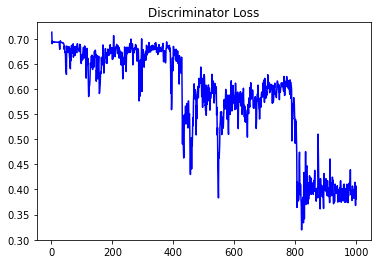

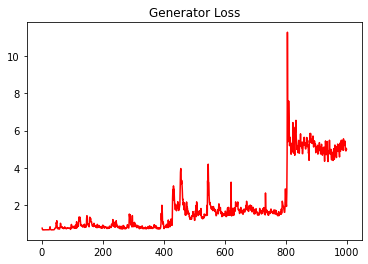

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.32902397742809414


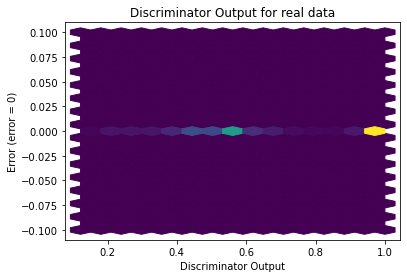

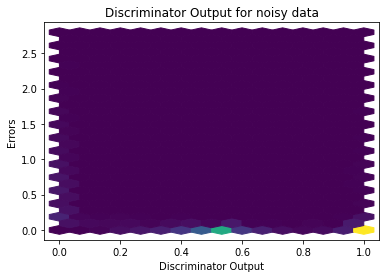

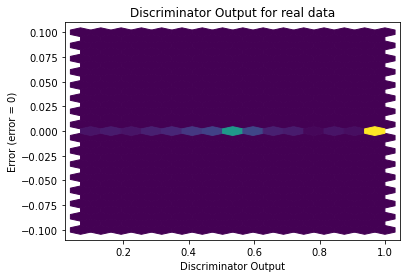

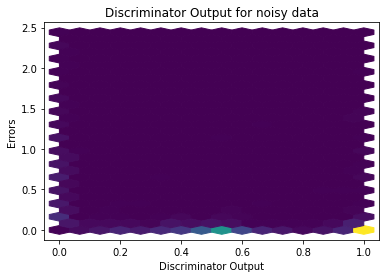

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

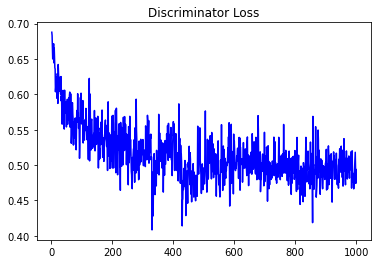

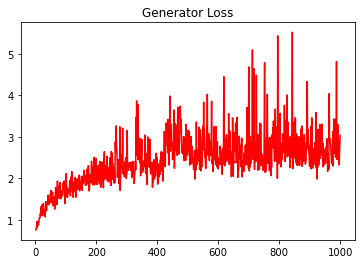

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.10766668151169048


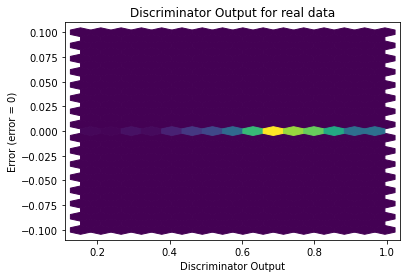

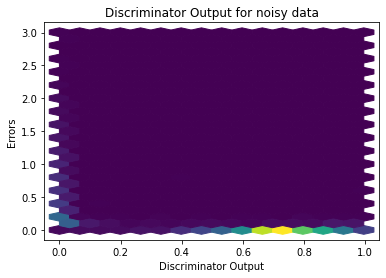

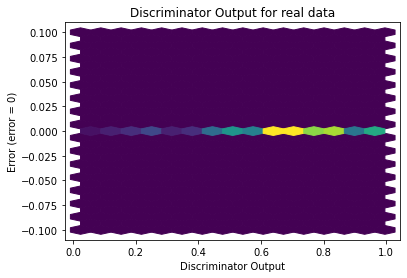

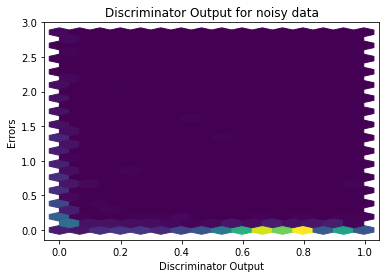

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


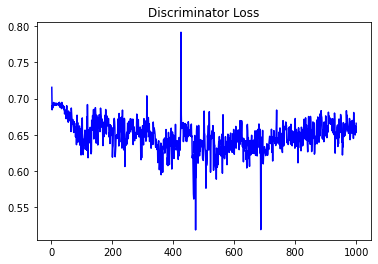

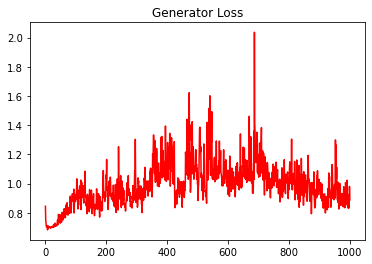

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.05512123556396404


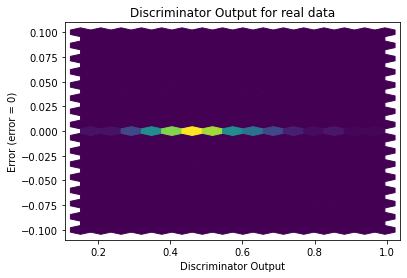

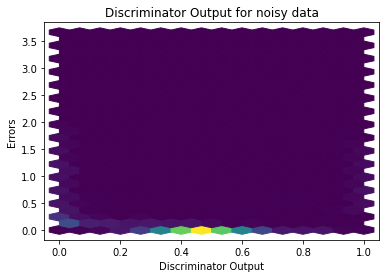

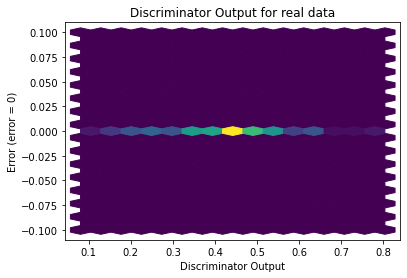

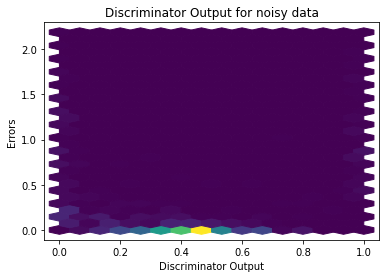

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


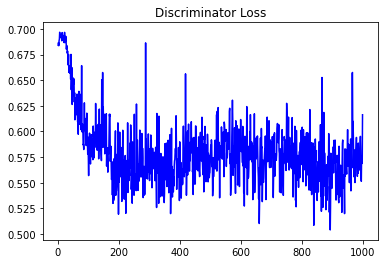

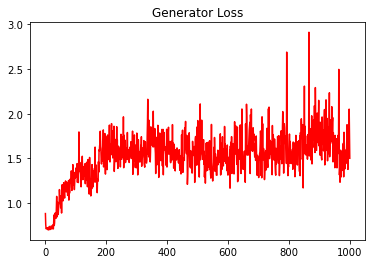

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.06402152684601871


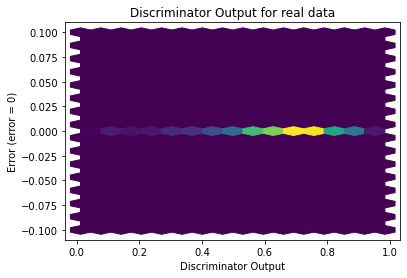

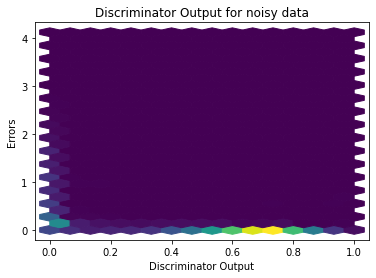

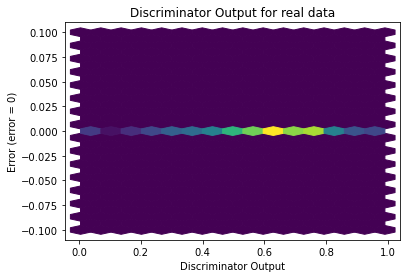

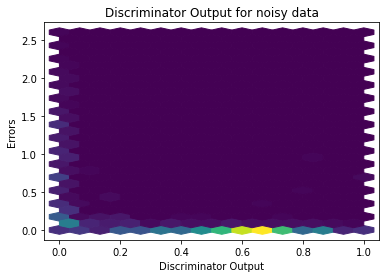

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3679]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4676]], requires_grad=True)
